In [6]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train_sparse), (x_test, y_test_sparse) = fashion_mnist.load_data()

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [7]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train_sparse)
y_test = to_categorical(y_test_sparse)

print(y_test.shape)

(10000, 10)


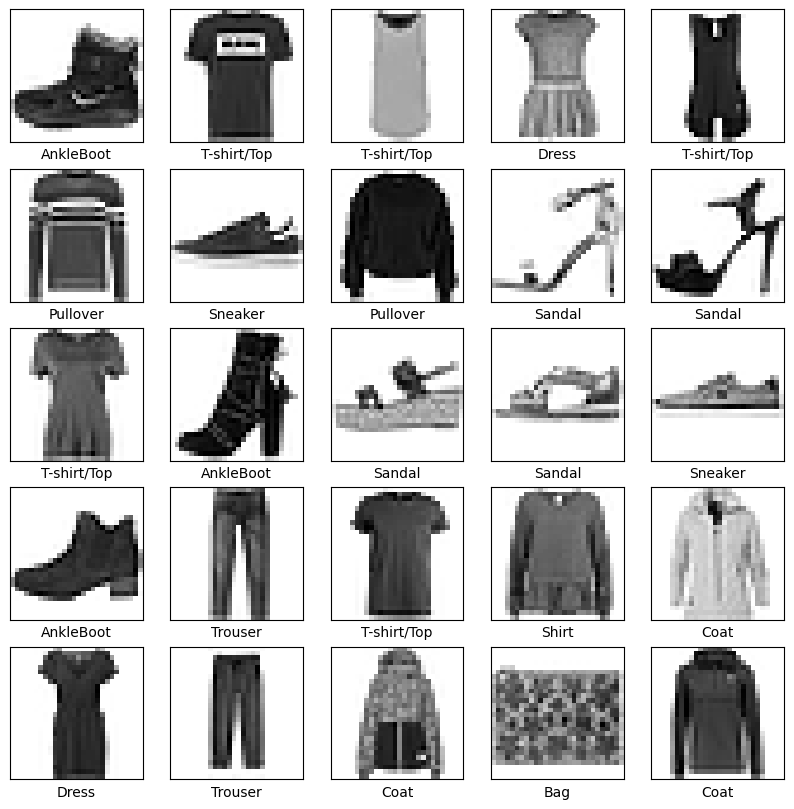

In [8]:
import matplotlib.pyplot as plt

x_train = x_train / 255.0
x_test = x_test / 255.0

class_names = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'AnkleBoot']
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train_sparse[i]])
plt.show()

# MLP

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Activation, LeakyReLU, PReLU

model = Sequential()
model.add(Flatten(input_shape=[28, 28]))
model.add(
    Dense(256, activation='elu', kernel_initializer='he_normal')
)
model.add(Activation('relu'))
model.add(LeakyReLU())
model.add(
    Dense(128, activation='selu', kernel_initializer='lecun_normal')
)
model.add(PReLU())
model.add(
    Dense(10, activation='softmax')
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 p_re_lu (PReLU)             (None, 128)               128       
                                                                 
 dense_2 (Dense)             (None, 10)                1

# Batch Normalization

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization

model = Sequential()
model.add(Flatten(input_shape=[28, 28]))
model.add(
    Dense(256, activation='elu', kernel_initializer='he_normal')
)
model.add(BatchNormalization(momentum=0.9))
model.add(
    Dense(128, activation='selu', kernel_initializer='lecun_normal')
)
model.add(BatchNormalization(center=False, scale=False))
model.add(
    Dense(10, activation='softmax')
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              256       
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 10)               

In [15]:
model.compile(
    loss='categorical_crossentropy',optimizer='RMSprop',metrics=['accuracy']
)
results = model.fit(
    x_train, y_train, batch_size=32, epochs=15, validation_split=0.1
)

Epoch 1/15
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1099 - accuracy: 0.9596 - val_loss: 0.4142 - val_accuracy: 0.8892
Epoch 2/15
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1060 - accuracy: 0.9600 - val_loss: 0.4702 - val_accuracy: 0.8837
Epoch 3/15
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1071 - accuracy: 0.9600 - val_loss: 0.4208 - val_accuracy: 0.8912
Epoch 4/15
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1031 - accuracy: 0.9617 - val_loss: 0.4647 - val_accuracy: 0.8877
Epoch 5/15
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1029 - accuracy: 0.9613 - val_loss: 0.4216 - val_accuracy: 0.8967
Epoch 6/15
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1041 - accuracy: 0.9613 - val_loss: 0.4932 - val_accuracy: 0.8802
Epoch 7/15
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1008 - accuracy: 0.9626 - val_loss: 0.4607 - val_accuracy: